![title](https://image.ibb.co/erDntK/logo2018.png)

---




# Task 9 - CNN Architectures

In this assignment you will practice in replicating famous Convolutional Neural Network Architectures available today using Keras and TensorFlow.

The goals of this assignment are as follows:
* understand the architecture advantages
* implement and train LeNet-5 on CIFAR-10
* implement AlexNet
* implement and train small AlexNet on CIFAR-10
* implement ZF-Net
* implement VGG Net
* implement and train small VGG on CIFAR-10
* implement and train small Inception Network on CIFAR-10
* implement and train small Residual Network on CIFAR-10

---
---
#[Part 0] Import Libraries and Load Data

---
## 0 - Install TensorFlow 2

If Tensorflow 2 is not already installed, install it first

In [1]:
!pip install tensorflow-gpu -q

     |████████████████████████████████| 380.8MB 78kB/s 
     |████████████████████████████████| 3.8MB 36.1MB/s 
     |████████████████████████████████| 450kB 43.1MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.0 which is incompatible.


In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

**EXPECTED OUTPUT**:
<pre>
 '2.0.0'

---
## 1 - Import Libraries
Import required libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import backend as K
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout, ZeroPadding2D
from tensorflow.keras.layers import GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

%matplotlib inline

Write down your Name and Student ID

In [0]:
## --- start your code here ----

NIM = 1301160098
Nama = "Panji Bagaskara"

## --- end your code here ----

---
## 2 - Load CIFAR-10

In [5]:
(X_train_ori, y_train), (X_test_ori, y_test) = tf.keras.datasets.cifar10.load_data()

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


170500096/170498071 [==============================] - 11s 0us/step


---
## 3 - Split Validation Data

In [0]:
X_val_ori = X_train_ori[-1000:,:]
y_val     = y_train[-1000:]

X_train_ori = X_train_ori[:-1000, :]
y_train     = y_train[:-1000]

---
## 4 - Normalize and Reshape Data

In [7]:
X_train = X_train_ori.astype('float32')
X_val   = X_val_ori.astype('float32')
X_test  = X_test_ori.astype('float32')

mean_image = X_train.mean(axis=(0, 1, 2), keepdims=True)
std_image = X_train.std(axis=(0, 1, 2), keepdims=True)

X_train = (X_train - mean_image) /std_image
X_val = (X_val - mean_image) /std_image
X_test = (X_test - mean_image) /std_image

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)

y_train = y_train.ravel()
y_val   = y_val.ravel()
y_test  = y_test.ravel()

print('\ny_train.shape =',y_train.shape)
print('y_val.shape   =',y_val.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (49000, 32, 32, 3)
X_val.shape   = (1000, 32, 32, 3)
X_test.shape  = (10000, 32, 32, 3)

y_train.shape = (49000,)
y_val.shape   = (1000,)
y_test.shape  = (10000,)


one hot the label

In [8]:
y_train_hot = to_categorical(y_train, 10)
y_val_hot   = to_categorical(y_val, 10)
y_test_hot  = to_categorical(y_test, 10)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (49000, 10)
y_val_hot.shape   = (1000, 10)
y_test_hot.shape  = (10000, 10)


---
## 5 - Helper Functions
train-val loss and accuracy plot helper function

In [0]:
def plot_my_history(history):
  plt.rcParams['figure.figsize'] = [14, 3.5]
  plt.subplots_adjust(wspace=0.2)

  plt.subplot(121)
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'])

  plt.subplot(122)
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'])
  plt.show()

---
# [Part 1] Shallow 4-Layer Neural Net
Here you will complete the implementation of 4-Layer Neural Network, just as comparison. 

---
## 1 - Define Model

Define the 4-layer Neural net



---
#### <font color='red'>**EXERCISE:** </font>

<pre>
Implement neuralnet() function
the function will return neural net with architecture:
    * the input shape is <font color='blue'><b>32x32x3</b></font>  
    * Flatten layer
    * <font color='blue'><b>200</b></font> neurons in hidden layer 1 and 2 using relu activation
    * <font color='blue'><b>100</b></font> neurons in hidden layer 3 also using relu activation
    * <font color='blue'><b>10</b></font> neurons in output layer using softmax activation



In [0]:
def neuralnet():    
    return Sequential([
        
        # input 32x32x3
        # flatten
        # dense 200 relu
        # dense 200 relu
        # dense 100 relu
        # dense 10 softmax
        
        Input(shape=(32, 32, 3)),
        Flatten(),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax')
        
    ], name="neuralnet")

---
## 2 - Model Summary
Visualize the model

In [11]:
model_nn = neuralnet()

model_nn.summary()  

Model: "neuralnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 675,910
Trainable params: 675,910
Non-trainable params: 0
_________________________________________________________________


**EXPECTED OUTPUT**:
<pre>
 Total params: 675,910
 Trainable params: 675,910
 Non-trainable params: 0

---
## 3 - Plot Model

Save model architecture as an image

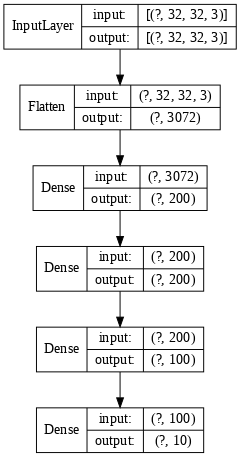

In [12]:
  plot_model(model_nn, 
             to_file=model_nn.name+'.png', 
             show_shapes=True, 
             show_layer_names=False,
             dpi=70
            )

**EXPECTED IMAGE (rotated)**:

<center>

<img src="https://i.ibb.co/pfC2QJR/4layer.png" height=300>

---
## 4 - Train Model


Run the training process 

---
#### <font color='red'>**EXERCISE:** </font>

    Train the network for 10 epochs
    with batch size = 100
    using Adam Optimizer
    and 'accuracy' as its metric



In [13]:
num_epochs = 10
batch_size = 100

model_nn.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)


history_nn = model_nn.fit(
    X_train, y_train_hot, 
    validation_data=(X_val, y_val_hot),
    epochs=num_epochs, 
    batch_size=batch_size, 
    verbose=2
)

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 - 4s - loss: 1.7267 - accuracy: 0.3927 - val_loss: 1.5710 - val_accuracy: 0.4520
Epoch 2/10
49000/49000 - 3s - loss: 1.4945 - accuracy: 0.4709 - val_loss: 1.5036 - val_accuracy: 0.4660
Epoch 3/10
49000/49000 - 3s - loss: 1.3847 - accuracy: 0.5117 - val_loss: 1.3990 - val_accuracy: 0.5060
Epoch 4/10
49000/49000 - 3s - loss: 1.2996 - accuracy: 0.5400 - val_loss: 1.3825 - val_accuracy: 0.4960
Epoch 5/10
49000/49000 - 3s - loss: 1.2275 - accuracy: 0.5666 - val_loss: 1.4308 - val_accuracy: 0.5010
Epoch 6/10
49000/49000 - 3s - loss: 1.1641 - accuracy: 0.5901 - val_loss: 1.4235 - val_accuracy: 0.5200
Epoch 7/10
49000/49000 - 3s - loss: 1.1015 - accuracy: 0.6114 - val_loss: 1.4319 - val_accuracy: 0.5280
Epoch 8/10
49000/49000 - 3s - loss: 1.0475 - accuracy: 0.6284 - val_loss: 1.4208 - val_accuracy: 0.5240
Epoch 9/10
49000/49000 - 3s - loss: 0.9869 - accuracy: 0.6512 - val_loss: 1.4168 - val_accuracy: 0.5300
Epoch 10/10
490

**EXPECTED OUTPUT**:
<pre>
 the loss should start around 1.7 and end around 0.9
 with training accuracy start around 40% and end around 66%

---
## 5 - Visualize Training History

Visualzie the train-validation accuracy

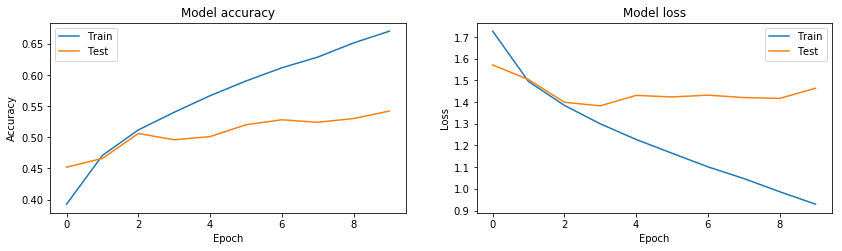

In [14]:
plot_my_history(history_nn)

---
## 6 - Evaluate Model
Next, let's evaluate the accuracy of the models that have been trained

we should get accuracy around  <font color='blue'>$50\%$</font>`

In [15]:
scores = model_nn.evaluate(X_test, y_test_hot, verbose=0)

print("\nModel Accuracy: %.2f%%" % (scores[1]*100))


Model Accuracy: 52.05%


---
---
# [Part 2] LeNet-5 (1998)

Next you will implement [LeNet-5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf), the first successful application of convolutional networks, developed for handwritten digits and character recognition by LeCun et al., 1998

The architecture consist of 5 layers (2 conv and 3 fc layers). 

The architecture visualization is as follows

<br>

<center>
<img src="https://www.researchgate.net/profile/Vladimir_Golovko3/publication/313808170/figure/fig3/AS:552880910618630@1508828489678/Architecture-of-LeNet-5.png">

---
## 1 - Define Model

Define the LeNet-5

The original network is using **tanh** activation function, 

but here, we'll use **relu**



---
#### <font color='red'>**EXERCISE:** </font>
<pre>
Implement <b>lenet5()</b> function
the function will return <b>conv</b>olutional neural net with architecture:    
    * the input shape is <font color='blue'><b>32x32x3</b></font>  
    * <b>conv</b> layer with <font color='blue'><b>6</b></font> filters of <font color='blue'><b>5x5</b></font>, using relu activation
    * <b>average pooling</b> with size <font color='blue'><b>2x2</b></font>
    
    * <b>conv</b> layer with <font color='blue'><b>16</b></font> filters of <font color='blue'><b>5x5</b></font>, using relu activation
    * <b>average pooling</b> with size <font color='blue'><b>2x2</b></font>
    * flatten layer
    
    * <b>dense</b> layer with <font color='blue'><b>120</b></font> neurons using relu activation
    * <b>dense</b> layer with <font color='blue'><b>84</b></font> neurons using relu activation
    * output <b>dense</b> layer with <font color='blue'><b>10</b></font> neuron using softmax activation


In [0]:
def lenet5():
    return Sequential([
        
        Input(shape=(32, 32, 3)),
        Conv2D(6, (5,5), activation='relu'), # conv 6 (5x5) relu, input 32x32x3
        AveragePooling2D(2), # avg pool (2x2)
        
        Conv2D(16, (5,5), activation='relu'), # conv 16 (5x5) relu
        AveragePooling2D(2), # avg pool (2x2)
        
        Flatten(), # flatten        
        Dense(120, activation='relu'), # dense 120 relu
        Dense(84, activation='relu'), # dense 84 relu
        Dense(10, activation='softmax') # dense 10 softmax
        
        
    ], name="lenet5")

---
## 2 - Model Summary
Visualize the model

In [17]:
model_lenet = lenet5()

model_lenet.summary()  

Model: "lenet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_5 (Dense)              (None, 84)                10164

**EXPECTED OUTPUT**:
<pre>
 Total params: 62,006
 Trainable params: 62,006
 Non-trainable params: 0

---
## 3 - Plot Model

Save model architecture as an image

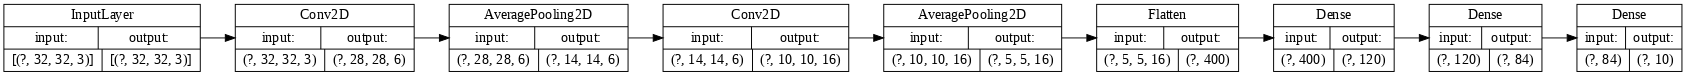

In [18]:
plot_model(model_lenet, 
           to_file=model_lenet.name+'.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='LR',
           dpi=70
          )

**EXPECTED IMAGE**:

<center>
<img src="https://i.ibb.co/n80BRC4/lenet5.png" width="90%"">

---
## 4 - Train Model


Run the training process 

---
#### <font color='red'>**EXERCISE:** </font>

    Train the network for 10 epochs
    with batch size = 100
    using Adam Optimizer
    and 'accuracy' as its metric



In [19]:
num_epochs = 10
batch_size = 100

model_lenet.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)


history_lenet = model_lenet.fit(
    X_train, y_train_hot, 
    validation_data=(X_val, y_val_hot),
    epochs=num_epochs, 
    batch_size=batch_size, 
    verbose=2
)

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 - 6s - loss: 1.6485 - accuracy: 0.4016 - val_loss: 1.4269 - val_accuracy: 0.4820
Epoch 2/10
49000/49000 - 4s - loss: 1.3546 - accuracy: 0.5179 - val_loss: 1.3063 - val_accuracy: 0.5420
Epoch 3/10
49000/49000 - 3s - loss: 1.2343 - accuracy: 0.5634 - val_loss: 1.1936 - val_accuracy: 0.5780
Epoch 4/10
49000/49000 - 3s - loss: 1.1486 - accuracy: 0.5945 - val_loss: 1.1326 - val_accuracy: 0.5940
Epoch 5/10
49000/49000 - 3s - loss: 1.0839 - accuracy: 0.6182 - val_loss: 1.0943 - val_accuracy: 0.6180
Epoch 6/10
49000/49000 - 3s - loss: 1.0261 - accuracy: 0.6385 - val_loss: 1.0683 - val_accuracy: 0.6350
Epoch 7/10
49000/49000 - 3s - loss: 0.9800 - accuracy: 0.6556 - val_loss: 1.0519 - val_accuracy: 0.6520
Epoch 8/10
49000/49000 - 3s - loss: 0.9363 - accuracy: 0.6706 - val_loss: 1.0264 - val_accuracy: 0.6550
Epoch 9/10
49000/49000 - 3s - loss: 0.8944 - accuracy: 0.6862 - val_loss: 1.0298 - val_accuracy: 0.6550
Epoch 10/10
490

**EXPECTED OUTPUT**:
<pre>
 the loss should start around 1.7 and end around 0.9
 with training accuracy start around 40% and end around 67%

---
## 5 - Visualize Training History

Visualize the train-validation accuracy

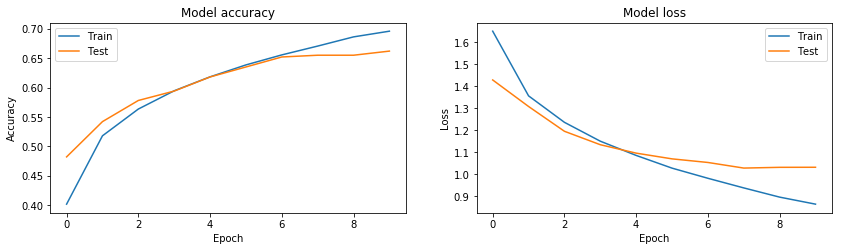

In [20]:
plot_my_history(history_lenet)

---
## 6 - Evaluate Model
Next, let's evaluate the accuracy of the models that have been trained

we should get accuracy around  <font color='blue'>$60\%$</font>

In [21]:
scores = model_lenet.evaluate(X_test, y_test_hot, verbose=0)

print("\nModel Accuracy: %.2f%%" % (scores[1]*100))


Model Accuracy: 62.90%


---
---
# [Part 3] AlexNet (2012)

The neural network developed by Krizhevsky, Sutskever, and Hinton in [$2012$](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) was the coming out party for CNNs in the computer vision community. It is widely regarded as one of the most influential publications in the field

This was the first time a model performed so well on a historically difficult ImageNet dataset. They win the $2012$ ILSVRC and marked the first year where a CNN was used to achieve a top five test error rate of $15.4%$

The network was made up of five conv layers, max-pooling layers, drop-out layers, and three fully connected layers. The network they designed was used for classification with $1,000$ possible categories.

Utilizing techniques that are still used today, such as data augmentation and dropout, this paper really illustrated the benefits of CNNs and backed them up with record breaking performance in the competition.

<br>

<center>
<img src='https://miro.medium.com/max/1200/1*wzflNwJw9QkjWWvTosXhNw.png' width=750px>

---
## 1 - Define Model

Define the AlexNet model

The original network is using **custom layer normalization**, 

but here, we'll use **Batch Normalization**



---
#### <font color='red'>**EXERCISE:** </font>

    Implement alexnet() function
    the function will return convolutional neural net with architecture:
    


<pre>------------------------------------------------------------------------------------------------------------------------
                   1                     |                   2                   |                   3
* the input shape is <font color='blue'><b>227x227x3  </b></font>         | * <b>zero padding 2d</b> with size <font color='blue'><b>2x2</b></font>       | * <b>zero padding 2d</b> with size <font color='blue'><b>1x1</b></font>
* <b>conv</b> layer with <font color='blue'><b>96</b></font> filters <font color='blue'><b>1x1</b></font>,        | * <b>conv</b> layer with <font color='blue'><b>256</b></font> filters <font color='blue'><b>5x5</b></font>     | * <b>conv</b> layer with <font color='blue'><b>384</b></font> filters of <font color='blue'><b>3x3</b></font> 
  <font color='blue'><b>stride=4</b></font>, using <b>relu</b> activation        |   using <b>relu</b> activation               |   using <b>relu</b> activation
* <b>max pooling</b> with size <font color='blue'><b>3x3</b></font> and <font color='blue'><b>stride=2</b></font> | * <b>max pooling</b> with size <font color='blue'><b>3x3</b></font>, <font color='blue'><b>stride=2</b></font> | 
* batch normalization layer              | * batch normalization layer           |

------------------------------------------------------------------------------------------------------------------------
                   4                     |                   5                   |                   6
* <b>zero padding 2d</b> with size <font color='blue'><b>1x1</b></font>          | * <b>zero padding 2d</b> with size <font color='blue'><b>1x1</b></font>       | * <b>flatten</b> layer
* <b>conv</b> layer with <font color='blue'><b>384</b></font> filters <font color='blue'><b>3x3</b></font>        | * <b>conv</b> layer with <font color='blue'><b>256</b></font> filters <font color='blue'><b>3x3</b></font>     | * <b>dense</b> layer with <font color='blue'><b>4096</b></font> neurons 
  using <b>relu</b> activation                  |   using <b>relu</b> activation               |   using <b>relu</b> activation
                                         | * <b>max pooling</b> with size <font color='blue'><b>3x3</b></font>, <font color='blue'><b>stride=2</b></font> | * <b>dropout</b> layer with <font color='blue'><b>0.5</b></font> probability
                                         |                                       |

------------------------------------------------------------------------------------------------------------------------
                   7                     |                   8                   |
* <b>dense</b> layer with <font color='blue'><b>4096</b></font> neurons          | * output <b>dense</b> layer with <font color='blue'><b>1000</b></font> neuron |
  using <b>relu</b> activation                  |   using <b>softmax</b> activation            |
* <b>dropout</b> layer with <font color='blue'><b>0.5</b></font> probability     |                                       |

------------------------------------------------------------------------------------------------------------------------

In [0]:
def alexnet():
    return Sequential([
        # 1
        # conv-maxpool-batchnorm
        Input(shape=(227, 227, 3)),
        Conv2D(96, (1,1), strides=4, activation='relu'),
        MaxPooling2D((3,3), strides=2),
        BatchNormalization(),
                
        # 2
        # zeropad-conv-maxpool-batchnorm
        ZeroPadding2D((2,2)),
        Conv2D(256, (5,5), activation='relu'),
        MaxPooling2D((3,3), strides=2),
        BatchNormalization(),
        
        # 3
        # zeropad-conv
        ZeroPadding2D((1,1)),
        Conv2D(384, (3,3), activation='relu'),
        
        # 4
        # zeropad-conv
        ZeroPadding2D((1,1)),
        Conv2D(384, (3,3), activation='relu'),
        
        # 5
        # zeropad-conv-maxpool
        ZeroPadding2D((1,1)),
        Conv2D(256, (3,3), activation='relu'),
        MaxPooling2D((3,3), strides=2),
        
        # 6
        # flatten-dense-dropout
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        # 7
        # dense-dropout
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        # 8
        # dense softmax
        Dense(1000, activation='softmax')
        
    ], name="alexnet")


---
## 2 - Model Summary
Visualize the model

In [34]:
model_alex = alexnet()

model_alex.summary()  

Model: "alexnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 57, 57, 96)        384       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 28, 28, 96)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 96)        384       
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 13, 256)       1024

**EXPECTED OUTPUT**:
<pre>
 Total params: 62,379,752
 Trainable params: 62,379,048
 Non-trainable params: 704


---
## 3 - Plot Model

Save model architecture as an image

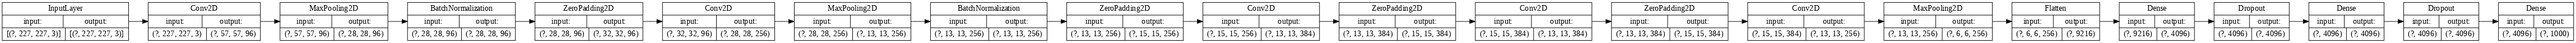

In [24]:
plot_model(model_alex, 
           to_file=model_alex.name+'.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='LR',
           dpi=70
          )

**EXPECTED IMAGE**:

<center>
<img src="https://i.ibb.co/T4HJfJD/alexnet.png" width="90%"">

---
---
# [Part 4] Small AlexNet

AlexNet was originally designed for ImageNet images with input of $227\times227\times3$, which is too big for our **CIFAR-10** dataset

Therefore, for now let's define our **small AlexNet** to classify **CIFAR-10** dataset.

It has the same **5-conv-3-fc** layer, but with $32\times32\times3$ input and $10$ class output

---
## 1 - Define Model

Define the Small AlexNet model




---
#### <font color='red'>**EXERCISE:** </font>

    Implement alexnet_small() function
    the function will return convolutional neural net with architecture:
    


<pre>------------------------------------------------------------------------------------------------------------------------
                   1                    |                  2                      |                   3
* the input shape is <font color='blue'><b>32x32x3</b></font>            | * <b>conv</b> layer with <font color='blue'><b>96</b></font> filters <font color='blue'><b>3x3</b></font>        | * <b>conv</b> layer with <font color='blue'><b>192</b></font> filters of <font color='blue'><b>3x3</b></font> 
* <b>conv</b> layer with <font color='blue'><b>48</b></font> filters <font color='blue'><b>5x5</b></font>,       |   padding=<b>same</b>, using <b>relu</b> activation   |   padding=<b>same</b>, using <b>relu</b> 
  padding=<b>same</b>, using <b>relu</b> activation   | * <b>max pooling</b> with size <font color='blue'><b>2x2</b></font>             | 
* <b>max pooling</b> with size <font color='blue'><b>2x2</b></font>             | * batch normalization layer             | 
* batch normalization layer             |                                         |

------------------------------------------------------------------------------------------------------------------------
                   4                    |                  5                      |                   6
* <b>conv</b> layer with <font color='blue'><b>192</b></font> filters of <font color='blue'><b>3x3</b></font>    | * <b>conv</b> layer with <font color='blue'><b>256</b></font> filters <font color='blue'><b>3x3</b></font>       | * <b>flatten</b> layer
  padding=<b>same</b>, using <b>relu</b> activation   |   padding=<b>same</b>, using <b>relu</b> activation   | * <b>dense</b> layer with <font color='blue'><b>512</b></font> neurons 
                                        | * <b>max pooling</b> with size <font color='blue'><b>2x2, stride=2</b></font>   |   using <b>relu</b> activation
                                        |                                         | * <b>dropout</b> layer with <font color='blue'><b>0.5 prob</b></font>
                                        |                                         |
------------------------------------------------------------------------------------------------------------------------
                 7                       |                  8                    |
* <b>dense</b> layer with <font color='blue'><b>256</b></font> neurons           | * output <b>dense</b> layer with <font color='blue'><b>10</b></font> neuron   |
  using <b>relu</b> activation                  |   using <b>softmax</b> activation            |
* <b>dropout</b> layer with <font color='blue'><b>0.5</b></font> probability     |                                       |

------------------------------------------------------------------------------------------------------------------------

In [0]:
def alexnet_small():
    return Sequential([
        # 1
        # conv-pool-batchnorm
        Input(shape=(32, 32, 3)),
        Conv2D(48, (5,5), padding='SAME', activation='relu'),
        MaxPooling2D(2),
        BatchNormalization(),
        
        # 2
        # conv-pool-batchnorm
        Conv2D(96, (3,3), padding='SAME', activation='relu'),
        MaxPooling2D(2),
        BatchNormalization(),
        
        # 3
        # conv
        Conv2D(192, (3,3), padding='SAME', activation='relu'),
        
        # 4
        # conv
        Conv2D(192, (3,3), padding='SAME', activation='relu'),
        
        # 5
        # conv-pool
        Conv2D(256, (3,3), padding='SAME', activation='relu'),
        MaxPooling2D(2, strides=2),
        
        # 6
        # flatten-dense-dropout
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        
        # 7
        # dense-dropout
        Dense(256, activation='relu'),
        Dropout(0.5),
        
        # 8
        # dense softmax
        Dense(10, activation='softmax')
        
    ], name="alexnet_small")


---
## 2 - Model Summary
Visualize the model

In [26]:
model_alex_small = alexnet_small()

model_alex_small.summary()  

Model: "alexnet_small"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        3648      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 48)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 48)        192       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 96)        41568     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 192)       

**EXPECTED OUTPUT**:
<pre>
 Total params: 3,295,210
 Trainable params: 3,294,922
 Non-trainable params: 288

---
## 3 - Plot Model

Save model architecture as an image

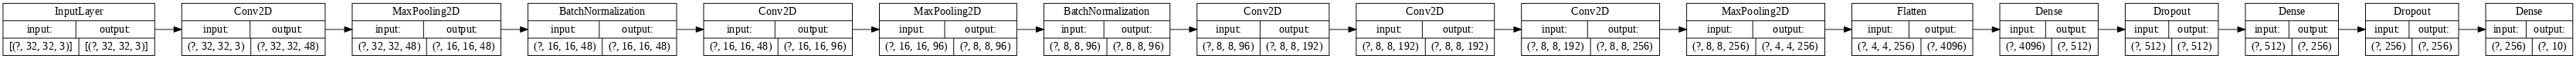

In [27]:
plot_model(model_alex_small, 
           to_file=model_alex_small.name+'.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='LR',
           dpi=70
          )

**EXPECTED IMAGE**:

<center>
<img src="https://i.ibb.co/jfNTjMP/alexnet-small.png" width="90%"">

---
## 4 - Train Model


Run the training process 

---
#### <font color='red'>**EXERCISE:** </font>

    Train the network for 10 epochs
    with batch size = 100
    using Adam Optimizer
    and 'accuracy' as its metric



In [28]:
num_epochs = 10
batch_size = 100


model_alex_small.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

history_alex_small = model_alex_small.fit(
    X_train, y_train_hot, 
    validation_data=(X_val, y_val_hot),
    epochs=num_epochs, 
    batch_size=batch_size, 
    verbose=2
)

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 - 18s - loss: 1.5525 - accuracy: 0.4308 - val_loss: 1.1930 - val_accuracy: 0.5760
Epoch 2/10
49000/49000 - 16s - loss: 1.1181 - accuracy: 0.6116 - val_loss: 0.9762 - val_accuracy: 0.6750
Epoch 3/10
49000/49000 - 16s - loss: 0.9244 - accuracy: 0.6829 - val_loss: 0.8397 - val_accuracy: 0.7080
Epoch 4/10
49000/49000 - 16s - loss: 0.7952 - accuracy: 0.7312 - val_loss: 0.7934 - val_accuracy: 0.7330
Epoch 5/10
49000/49000 - 16s - loss: 0.7027 - accuracy: 0.7618 - val_loss: 0.6892 - val_accuracy: 0.7810
Epoch 6/10
49000/49000 - 16s - loss: 0.6208 - accuracy: 0.7907 - val_loss: 0.7323 - val_accuracy: 0.7620
Epoch 7/10
49000/49000 - 16s - loss: 0.5520 - accuracy: 0.8115 - val_loss: 0.6716 - val_accuracy: 0.7960
Epoch 8/10
49000/49000 - 16s - loss: 0.4978 - accuracy: 0.8299 - val_loss: 0.6842 - val_accuracy: 0.7750
Epoch 9/10
49000/49000 - 16s - loss: 0.4479 - accuracy: 0.8478 - val_loss: 0.7072 - val_accuracy: 0.7690
Epoch 

**EXPECTED OUTPUT**:
<pre>
 the loss should start around 1.6 and end around 0.4
 with training accuracy start around 40% and end around 85%

---
## 5 - Visualize Training History

Visualize the train-validation accuracy

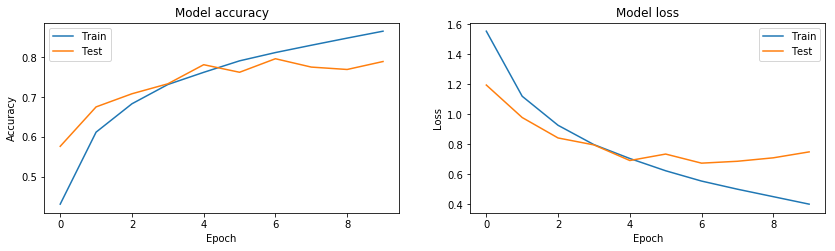

In [29]:
plot_my_history(history_alex_small)

---
## 6 - Evaluate Model
Next, let's evaluate the accuracy of the models that have been trained

we should get accuracy around  <font color='blue'>$75\%$</font>`

In [30]:
scores = model_alex_small.evaluate(X_test, y_test_hot, verbose=0)

print("\nModel Accuracy: %.2f%%" % (scores[1]*100))


Model Accuracy: 78.29%


---
---
# [Part 5] ZF-Net (2013)

ZF Net was not only the winner of the competition in $2013$, but also provided great intuition as to the workings on CNNs and illustrated more ways to improve performance. 
This model achieved an $11.2%$ error rate, which was more of a fine-tuning to the previous AlexNet structure

The authors spent a good amount of time explaining a lot of the intuition behind ConvNets and showing how to visualize the filters and weights correctly.

The fascinating deconv visualization approach and occlusion experiments described helps not only to explain the inner workings of CNNs, but also provides insight for improvements to network architectures. 

At this point, Zeiler and Rob Fergus showed the world that CNNs are not black magic which somehow works

<br>

<center>
<img src='https://adeshpande3.github.io/assets/zfnet.png'  width=800px>
</center>


<br>
ZF-Net is very similar architecture to AlexNet except for a few minor modifications.

Instead of using $11\times11$ sized filters in the first layer (which is what AlexNet implemented), ZFNet used filters of size $7\times7$ and a decreased stride value. 

The reasoning behind this modification is that a smaller filter size in the first conv layer helps retain a lot of original pixel information in the input volume. 

A filtering of size $11\times11$ proved to be skipping a lot of relevant information, especially as this is the first conv layer.

---
## 1 - Define Model

Define the ZFNet model




---
#### <font color='red'>**EXERCISE:** </font>

    Implement zfnet() function
    the function will return convolutional neural net with architecture:
    


<pre>------------------------------------------------------------------------------------------------------------------------
                   1                    |                   2                    |                   3
* the input shape is <font color='blue'><b>224x224x3</b></font>          | * <b>conv</b> layer with <font color='blue'><b>256</b></font> filters <font color='blue'><b>5x5 </b></font>     | * <b>conv</b> layer with <font color='blue'><b>384</b></font> filters of <font color='blue'><b>3x3 </b></font>
* <b>conv</b> layer with <font color='blue'><b>96</b></font> filters <font color='blue'><b>7x7</b></font>,       |   <font color='blue'><b>strides=2</b></font>, using <b>relu</b> activation     |   padding=<b>same</b>, using <b>relu</b> 
  <font color='blue'><b>strides=2</b></font>, using <b>relu</b> activation      | * <b>max pooling</b> with size <font color='blue'><b>3x3</b></font>,           | 
* <b>max pooling</b> with size <font color='blue'><b>3x3</b></font>,            |   <font color='blue'><b>strides=2</b></font>, padding=<b>same</b>              |
  <font color='blue'><b>strides=2</b></font>, padding=<b>same</b>               | * <b>batch normalization</b> layer            | 
* <b>batch normalization</b> layer             |                                        |

------------------------------------------------------------------------------------------------------------------------
                   4                    |                   5                    |                   6
* <b>conv</b> layer with <font color='blue'><b>384</b></font> filters of <font color='blue'><b>3x3</b></font>    | * <b>conv</b> layer with <font color='blue'><b>256</b></font> filters <font color='blue'><b>3x3</b></font>      | * <b>flatten</b> layer
  padding=<b>same</b>, using <b>relu</b> activation   |   padding=<b>same</b>, using <b>relu</b> activation  | * <b>dense</b> layer with <font color='blue'><b>4096</b></font> neurons 
                                        | * <b>max pooling</b> with size <font color='blue'><b>3x3, stride=2</b></font>  |   using <b>relu</b> activation
                                        |                                        | * <b>dropout</b> layer with <font color='blue'><b>0.5 prob</b></font>
                                        |                                        |
------------------------------------------------------------------------------------------------------------------------
                 7                      |                  8                     |
* <b>dense</b> layer with <font color='blue'><b>4096</b></font> neurons         | * output <b>dense</b> layer with <font color='blue'><b>1000</b></font> neuron  |
  using <b>relu</b> activation                 |   using <b>softmax</b> activation             |
* <b>dropout</b> layer with <font color='blue'><b>0.5</b></font> probability    |                                        |

------------------------------------------------------------------------------------------------------------------------

In [0]:
def zfnet():
    return Sequential([
        
        # 1
        # conv-pool-batchnorm
        Input(shape=(224, 224, 3)),
        Conv2D(96, (7,7), strides=2, activation='relu'),
        MaxPooling2D(3, strides=2, padding='SAME'),
        BatchNormalization(),

        # 2
        # conv-pool-batchnorm
        Conv2D(256, (5,5), strides=2, activation='relu'),
        MaxPooling2D(3, strides=2, padding='SAME'),
        BatchNormalization(),

        # 3
        # conv
        Conv2D(384, (3,3), padding='SAME', activation='relu'),

        # 4
        # conv
        Conv2D(384, (3,3), padding='SAME', activation='relu'),

        # 5
        # conv-pool
        Conv2D(256, (3,3), padding='SAME', activation='relu'),
        MaxPooling2D(3, strides=2),
        
        # 6
        # flatten-dense-dropout
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),

        # 7
        # dense-dropout
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        # 8
        # dense softmax
        Dense(1000, activation='softmax')
        
    ], name="zfnet")


---
## 2 - Model Summary
Visualize the model

In [36]:
model_zfnet = zfnet()

model_zfnet.summary()  

Model: "zfnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 109, 109, 96)      14208     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 55, 55, 96)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 384)       885120

**EXPECTED OUTPUT**:
<pre>
 Total params: 62,359,016
 Trainable params: 62,358,312
 Non-trainable params: 704

---
## 3 - Plot Model

Save model architecture as an image

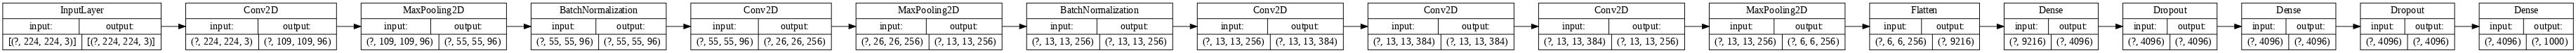

In [37]:
plot_model(model_zfnet, 
           to_file=model_zfnet.name+'.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='LR',
           dpi=70
          )

**EXPECTED IMAGE**:

<center>
<img src="https://i.ibb.co/DMKwLqs/zfnet.png" width="90%"">

---
---
# [Part 6] VGG Net (2014)

Simplicity and depth, that's what this network is.

[VGG Net](http://arxiv.org/pdf/1409.1556v6.pdf) is one of the most influential papers because it reinforced the notion that convolutional neural networks have to have a deep network of layers in order for this hierarchical representation of visual data to work. 

It placed 2nd in ILSVRC 2014 with its 7.3% error rate.

<br>


<center>
<img src='http://www.sanko-shoko.net/note.php?img=y1kl'  width=700px>
  
  </center>
  
  





The network that was submitted to the competition consist of **5 convolution blocks** and **3 fc layers**. 
<pre>
Keep it deep. Keep it simple.
* Each convolution layer uses a <b>3x3</b> filter and <b>padding=1 </b> (same).
* Each convolution block ends with maxpooling <b>2x2</b>
* Each layer uses relu activation
</pre>

<center>
  <img src='https://www.yjpark.me/assets/expressions/VGG-config.png' width=50%>
</center>

There are **5 variations** of the network submitted, each with different number of convolution layers in the convolution block. 

Each network variation is known by name according to the number of actual layers in the network. 

    E.g.
    * VGG16 has 16 layers (13 conv + 3 fc),
    * VGG19 has 19 layers (16 conv + 3 fc)
    

---
## 1 - Define VGG16 Model

Define the VGG16 model




---
#### <font color='red'>**EXERCISE:** </font>

<pre>
Implement <b>vgg16()</b> function
the function will return convolutional neural net with architecture:    
    * Each convolution layer uses a <font color='blue'><b>3x3</b></font> filter and <b>padding=1</b> (same). 
    * Each convolution block ends with maxpooling <font color='blue'><b>2x2</b></font>
    * Each layer uses relu activation


<pre>------------------------------------------------------------------------------------------------------------------------
             block 1                               block 2                               block 3
* the input shape is <font color='blue'><b>224x224x3</b></font>    | * <font color='blue'><b>2x</b></font> <b>conv</b> layer with <font color='blue'><b>128</b></font> filter     | * <font color='blue'><b>3x</b></font> <b>conv</b> layer with <font color='blue'><b>256</b></font> filter  
* <font color='blue'><b>2x</b></font> <b>conv</b> layer with <font color='blue'><b>64</b></font> filter    | * <b>maxpool</b> layer                     |   (4x for vgg19)
* <b>maxpool</b> layer                   |                                     | * <b>maxpool</b> layer

------------------------------------------------------------------------------------------------------------------------
             block 4                               block 5                              FC block 1
* <font color='blue'><b>3x</b></font> <b>conv</b> layer with <font color='blue'><b>512</b></font> filter   | * <font color='blue'><b>3x</b></font> <b>conv</b> layer with <font color='blue'><b>512</b></font> filter     | * <b>flatten</b> layer 
  (4x for vgg19)                  |   (4x for vgg19)                    | * <b>dense</b> layer with <font color='blue'><b>4096</b></font> neurons 
* <b>maxpool</b> layer                   | * <b>maxpool</b> layer                     | * <b>dropout</b> layer with <font color='blue'><b>0.5 prob</b></font>

------------------------------------------------------------------------------------------------------------------------
           FC block 2             |                FC block 3           |
* <b>dense</b> layer with <font color='blue'><b>4096</b></font> neurons   | * output <b>dense</b> layer <font color='blue'><b>1000</b></font> neuron    |
* <b>dropout</b> layer with <font color='blue'><b>0.5 prob</b></font>     |   using <b>softmax</b> activation          |

------------------------------------------------------------------------------------------------------------------------



In [0]:
def vgg16():
    return Sequential([
        
        # 1-2 (block 1)
        # conv-conv-pool
        Input(shape=(224, 224, 3)),
        Conv2D(64, (3,3), padding='SAME', activation='relu'),
        Conv2D(64, (3,3), padding='SAME', activation='relu'),
        MaxPooling2D(2),

        # 3-4 (block 2)
        # conv-conv-pool
        Conv2D(128, (3,3), padding='SAME', activation='relu'),
        Conv2D(128, (3,3), padding='SAME', activation='relu'),
        MaxPooling2D(2),

        # 5-7 (block 3)
        # conv-conv-conv-pool
        Conv2D(256, (3,3), padding='SAME', activation='relu'),
        Conv2D(256, (3,3), padding='SAME', activation='relu'),
        Conv2D(256, (3,3), padding='SAME', activation='relu'),
        MaxPooling2D(2),
        
        # 8-10 (block 4)
        # conv-conv-conv-pool
        Conv2D(512, (3,3), padding='SAME', activation='relu'),
        Conv2D(512, (3,3), padding='SAME', activation='relu'),
        Conv2D(512, (3,3), padding='SAME', activation='relu'),
        MaxPooling2D(2),

        # 11-13 (block 5)
        # conv-conv-conv-pool
        Conv2D(512, (3,3), padding='SAME', activation='relu'),
        Conv2D(512, (3,3), padding='SAME', activation='relu'),
        Conv2D(512, (3,3), padding='SAME', activation='relu'),
        MaxPooling2D(2),

        # 14
        # flatten-dense-dropout
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        # 15
        # dense-dropout
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        # 16
        # dense softmax
        Dense(1000, activation='softmax')
        
    ], name='vgg16')


---
## 2 - Model Summary
Visualize the model

In [39]:
model_vgg = vgg16()

model_vgg.summary()  

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 56, 56, 256)       295168

**EXPECTED OUTPUT**:
<pre>
 Total params: 138,357,544
 Trainable params: 138,357,544
 Non-trainable params: 0

---
## 3 - Plot Model

Save model architecture as an image

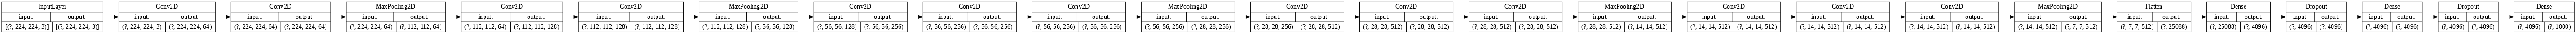

In [40]:
plot_model(model_vgg, 
           to_file=model_vgg.name+'.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='LR',
           dpi=70
          )

**EXPECTED IMAGE**:

<center>
<img src="https://i.ibb.co/85ZnYcn/vgg16.png" width="90%"">

---
---
# [Part 7] Small VGG

Just like we did with AlexNet,
let's create a vgg_small model to classify the CIFAR-10 dataset

but with $32\times32\times3$ input and $10$ class output, we can only use **3-conv blocks** and **3-fc** layer, instead of 5-conv blocks. 

This is due to that the conv block performs maxpool, then after the third max pool, it left us with input size of $4\times4$

---
## 1 - Define Model

Define the Small VGG model




---
#### <font color='red'>**EXERCISE:** </font>

<pre>
    Implement <b>vgg_small()</b> function
    the function will return convolutional neural net with architecture:
    
    * Each convolution layer uses a <font color='blue'><b>3x3</b></font> filter and <b>padding=1</b> (same). 
    * Each convolution block ends with maxpooling <font color='blue'><b>2x2</b></font>
    * Each layer uses relu activation


<pre>------------------------------------------------------------------------------------------------------------------------
             block 1                               block 2                               block 3
* the input shape is <font color='blue'><b>32x32x3</b></font>      | * <font color='blue'><b>3x</b></font> <b>conv</b> layer with <font color='blue'><b>64</b></font> filter     | * <font color='blue'><b>3x</b></font> <b>conv</b> layer with <font color='blue'><b>128</b></font> filter  
* <font color='blue'><b>3x</b></font> <b>conv</b> layer with <font color='blue'><b>32</b></font> filter    | * <b>maxpool</b> layer                     | * <b>maxpool</b> layer
* <b>maxpool</b> layer                   |                                     | 

------------------------------------------------------------------------------------------------------------------------
           FC block 1             |               FC block 2            |              FC block 3             
* <b>flatten</b> layer                   | * <b>dense</b> layer with <font color='blue'><b>256</b></font> neurons      | * output <b>dense</b> layer <font color='blue'><b>10</b></font> neuron    
* <b>dense</b> layer with <font color='blue'><b>512</b></font> neurons    | * <b>dropout</b> layer with <font color='blue'><b>0.5</b></font> prob       |   using <b>softmax</b> activation          
* <b>dropout</b> layer with <font color='blue'><b>0.5</b></font> prob     |                                     |

------------------------------------------------------------------------------------------------------------------------



In [0]:
def vgg_small():
    return Sequential([
        
        # 1-3 (block 1)
        # conv-conv-conv-pool
        Input(shape=(32,32,3)),
        Conv2D(32, (3,3), padding='SAME', activation='relu'),
        Conv2D(32, (3,3), padding='SAME', activation='relu'),
        Conv2D(32, (3,3), padding='SAME', activation='relu'),
        MaxPooling2D(2),

        # 4-6 (block 2)
        # conv-conv-conv-pool
        Conv2D(64, (3,3), padding='SAME', activation='relu'),
        Conv2D(64, (3,3), padding='SAME', activation='relu'),
        Conv2D(64, (3,3), padding='SAME', activation='relu'),
        MaxPooling2D(2),

        # 7-9 (block 3)
        # conv-conv-conv-pool
        Conv2D(128, (3,3), padding='SAME', activation='relu'),
        Conv2D(128, (3,3), padding='SAME', activation='relu'),
        Conv2D(128, (3,3), padding='SAME', activation='relu'),
        MaxPooling2D(2),


        # 10
        # flatten-dense-dropout
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        
        # 11
        # dense-dropout
        Dense(256, activation='relu'),
        Dropout(0.5),
        
        # 12
        # dense softmax
        Dense(10, activation='softmax')
        
    ], name='vgg16_small')


---
## 2 - Model Summary
Visualize the model

In [42]:
model_vgg_small = vgg_small()

model_vgg_small.summary()  

Model: "vgg16_small"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 64)        

**EXPECTED OUTPUT**:
<pre>
 Total params: 1,663,754
 Trainable params: 1,663,754
 Non-trainable params: 0

---
## 3 - Plot Model

Save model architecture as an image

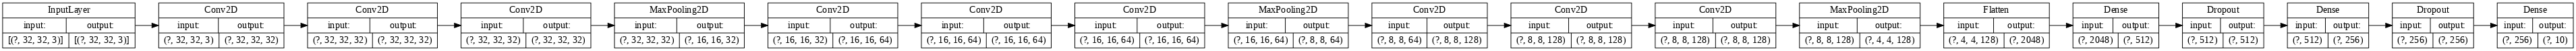

In [43]:
plot_model(model_vgg_small, 
           to_file=model_vgg_small.name+'.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='LR',
           dpi=70
          )

**EXPECTED IMAGE**:

<center>
<img src="https://i.ibb.co/CwCmfPk/vgg-small.png" width="90%"">

---
## 4 - Train Model


Run the training process 

---
#### <font color='red'>**EXERCISE:** </font>

    Train the network for 10 epochs
    with batch size = 100
    using Adam Optimizer
    and 'accuracy' as its metric



In [46]:
num_epochs = 10
batch_size = 100


model_vgg_small.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

history_vgg_small = model_vgg_small.fit(
    X_train, y_train_hot, 
    validation_data=(X_val, y_val_hot),
    epochs=num_epochs, 
    batch_size=batch_size, 
    verbose=2
)

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 - 21s - loss: 1.7789 - accuracy: 0.3124 - val_loss: 1.3726 - val_accuracy: 0.5020
Epoch 2/10
49000/49000 - 19s - loss: 1.2562 - accuracy: 0.5426 - val_loss: 1.0117 - val_accuracy: 0.6480
Epoch 3/10
49000/49000 - 19s - loss: 1.0086 - accuracy: 0.6464 - val_loss: 0.9412 - val_accuracy: 0.6600
Epoch 4/10
49000/49000 - 19s - loss: 0.8611 - accuracy: 0.7012 - val_loss: 0.8027 - val_accuracy: 0.7290
Epoch 5/10
49000/49000 - 19s - loss: 0.7529 - accuracy: 0.7403 - val_loss: 0.7380 - val_accuracy: 0.7340
Epoch 6/10
49000/49000 - 19s - loss: 0.6741 - accuracy: 0.7695 - val_loss: 0.7102 - val_accuracy: 0.7490
Epoch 7/10
49000/49000 - 19s - loss: 0.6107 - accuracy: 0.7896 - val_loss: 0.6496 - val_accuracy: 0.7810
Epoch 8/10
49000/49000 - 19s - loss: 0.5489 - accuracy: 0.8112 - val_loss: 0.6615 - val_accuracy: 0.7770
Epoch 9/10
49000/49000 - 19s - loss: 0.4973 - accuracy: 0.8308 - val_loss: 0.6944 - val_accuracy: 0.7650
Epoch 

**EXPECTED OUTPUT**:
<pre>
 the loss should start around 1.8 and end around 0.5
 with training accuracy start around 30% and end around 83%

---
## 5 - Visualize Training History

Visualize the train-validation accuracy

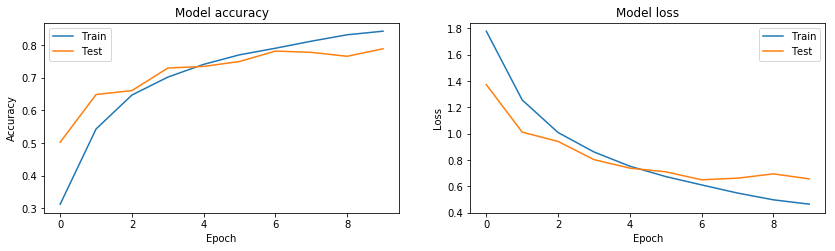

In [47]:
plot_my_history(history_vgg_small)

---
## 6 - Evaluate Model
Next, let's evaluate the accuracy of the models that have been trained

we should get accuracy around  <font color='blue'>$75\%$</font>

In [48]:
scores = model_vgg_small.evaluate(X_test, y_test_hot, verbose=0)

print("\nModel Accuracy: %.2f%%" % (scores[1]*100))


Model Accuracy: 77.98%


**Hey**, it's lower than small AlexNet

But you can see that with small AlexNet, the network starts to overfit even with only 10 epochs.

However with our small VGG, the gap between train and validation is still small, which may indicates that it can still be trained further

---
---
# [Part 8] GoogLeNet (2014)

[GoogLeNet](http://arxiv.org/abs/1512.00567) was one of the first models that introduced the idea that CNN layers didn’t always have to be stacked up sequentially. 

Coming up with the **Inception module**, the authors showed that a creative structuring of layers can lead to improved performance and computationally efficiency. The authors of the paper emphasized that this new model places notable consideration on memory and power usage.

This paper has really set the stage for some amazing architectures that we could see in the coming years.

<img src='https://adeshpande3.github.io/assets/GoogLeNet.png'>

The original GoogLeNet uses 9 Inception Module with equivalent with over 100 layers

**That's DEEP**

open this [link](https://adeshpande3.github.io/assets/GoogleNet.gif) to see the detailed gif of the network
<center>
<img src='https://adeshpande3.github.io/assets/GoogleNet.gif' width=30%>

---
## 1 - Inception Module

Building an Inception Module is quite hairy so let's just build the small version for our CIFAR-10

The inception module consist of 4 branches (also called tower) which incorporate three different types of convolution and pooling

<center>
<img src='https://miro.medium.com/max/1108/1*sezFsYW1MyM9YOMa1q909A.png'>
  
</center>

To implement it using TensorFlow and Keras, it's better if you use Functional API modelling

---
#### <font color='red'>**EXERCISE:** </font>
<pre>
Implement <b>inception()</b> function
Use <b>Functional API</b>
Each convolution layer uses <b>relu</b> activation and <b>padding=same</b>. 

with input <b>x</b> and number of filter <b>nF</b>, the module consist of 4 branch:    
    * tower 0 = conv with nF filters of 1x1 (x)

    * tower 1 = conv with nF filters of 1x1 (x)
    * tower 1 = conv with nF filters of 3x3 (tower 1)
    
    * tower 2 = conv with nF filters of 1x1 (x)
    * tower 2 = conv with nF filters of 5x5 (tower 2)
    
    * tower 3 = maxpool 3x3 stride=1 padding=same (x)
    * tower 3 = conv nF, 1x1 (tower 3)
    
return the concatenation of all four inputs
(use tf.keras.layers.concatenate)



In [0]:
from tensorflow.keras.layers import concatenate

def inception(x, nF):
    '''
    inputs:
    - x : input tensor
    - nF: number of convolution filter

    '''
  
    tower_0 = Conv2D(nF, (1,1), padding='SAME', activation='relu') (x)
    
    tower_1 = Conv2D(nF, (1,1), padding='SAME', activation='relu') (x)
    tower_1 = Conv2D(nF, (3,3), padding='SAME', activation='relu') (tower_1)

    tower_2 = Conv2D(nF, (1,1), padding='SAME', activation='relu') (x)
    tower_2 = Conv2D(nF, (5,5), padding='SAME', activation='relu') (tower_2)

    tower_3 = MaxPooling2D(3, strides=1, padding='SAME') (x)
    tower_3 = Conv2D(nF, (1,1), padding='SAME', activation='relu') (tower_3)
    
    output = concatenate([tower_0, tower_1, tower_2, tower_3], axis = 3)
    
    return output

---
## 2 - Small GoogLeNet Model

Define the Small GoogLeNet model




---
#### <font color='red'>**EXERCISE:** </font>
<pre>
Implement <b>googlenet_small()</b> function
Use <b>Functional API</b>

the function will return convolutional neural net with architecture:
    * input_img = Input layer with input shape is 32x32x3 
    
    * x = conv layer with 32 filters of 3x3, padding=same and relu activation (input_img)
    * x = inception module with input x and 32 filters
    * x = inception module with input x and 64 filters
    * x = max pool layer (x)
    * x = inception module with input x and 128 filters
    * x = inception module with input x and 128 filters
    * x = global average pooling (x)
    
    * out = dense layer with 10 neurons and softmax activation (x)
    
define model from input=input_img to output=out
    


In [0]:
def googlenet_small():
    
    # Input layer
    input_img = Input(shape = (32, 32, 3))
    
    # conv layer with 32 filters of 3x3, padding=same and relu activation
    x = Conv2D(32, (3,3), padding='SAME', activation='relu') (input_img)
    
    # inception module with input x and 32 filters
    x = inception(x, 32)
  
    # inception module with input x and 64 filters
    x = inception(x, 64)
    
    # max pool
    x = MaxPooling2D(2) (x)
    
    # 2x inception module with input x and 128 filters
    x = inception(x, 128)
    x = inception(x, 128)
    
    # global average pooling
    x = GlobalAveragePooling2D() (x)
  
    # output dense of 10 class with softmax activation
    out = Dense(10, activation='softmax') (x)

    model = Model(inputs = input_img, outputs = out, name='googlenet_small')
    
    return model


---
## 3 - Model Summary
Visualize the model

In [67]:
model_googlenet = googlenet_small()

model_googlenet.summary()  

Model: "googlenet_small"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_174 (Conv2D)             (None, 32, 32, 32)   896         input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_176 (Conv2D)             (None, 32, 32, 32)   1056        conv2d_174[0][0]                 
__________________________________________________________________________________________________
conv2d_178 (Conv2D)             (None, 32, 32, 32)   1056        conv2d_174[0][0]                 
____________________________________________________________________________________

**EXPECTED OUTPUT**:
<pre>
 Total params: 1,726,410
 Trainable params: 1,726,410
 Non-trainable params: 0

---
## 4 - Plot Model

Save model architecture as an image

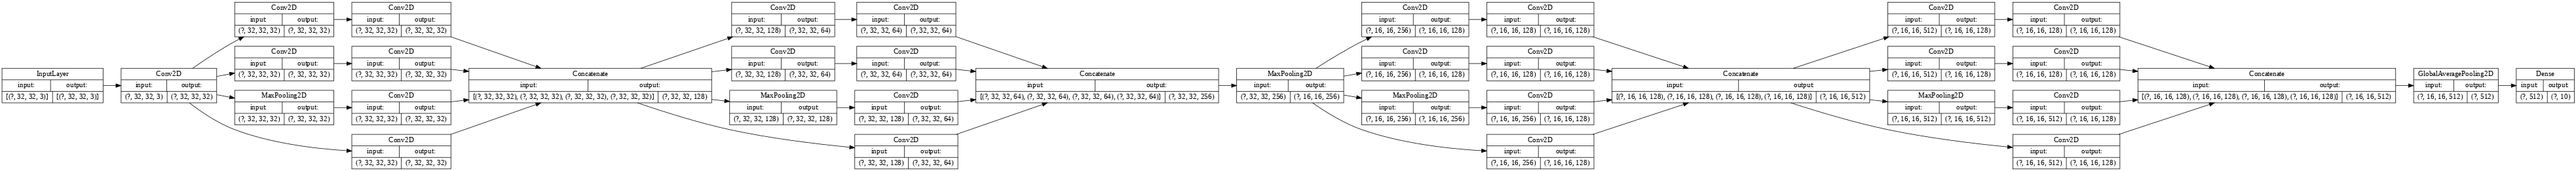

In [68]:
plot_model(model_googlenet, 
           to_file=model_googlenet.name+'.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='LR',
           dpi=55
          )

**EXPECTED IMAGE**:

<center>
  

<a href="https://i.ibb.co/PCjJMf9/googlenet.png" target="_blank">
  <img align="center"  src="https://i.ibb.co/PCjJMf9/googlenet.png"/>
</a>


---
## 5 - Train Model


Run the training process 

---
#### <font color='red'>**EXERCISE:** </font>

    Train the network for 10 epochs
    with batch size = 100
    using Adam Optimizer
    and 'accuracy' as its metric

  

In [69]:
num_epochs = 10
batch_size = 100

model_googlenet.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)


history_googlenet = model_googlenet.fit(
    X_train, y_train_hot, 
    validation_data=(X_val, y_val_hot),
    epochs=num_epochs, 
    batch_size=batch_size, 
    verbose=2
)


Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 - 124s - loss: 1.5854 - accuracy: 0.4036 - val_loss: 1.3193 - val_accuracy: 0.5380
Epoch 2/10
49000/49000 - 121s - loss: 1.1101 - accuracy: 0.6014 - val_loss: 1.0056 - val_accuracy: 0.6460
Epoch 3/10
49000/49000 - 121s - loss: 0.8961 - accuracy: 0.6806 - val_loss: 0.8549 - val_accuracy: 0.7040
Epoch 4/10
49000/49000 - 120s - loss: 0.7587 - accuracy: 0.7300 - val_loss: 0.7594 - val_accuracy: 0.7370
Epoch 5/10
49000/49000 - 120s - loss: 0.6515 - accuracy: 0.7719 - val_loss: 0.7015 - val_accuracy: 0.7520
Epoch 6/10
49000/49000 - 120s - loss: 0.5676 - accuracy: 0.8020 - val_loss: 0.6723 - val_accuracy: 0.7700
Epoch 7/10
49000/49000 - 120s - loss: 0.5019 - accuracy: 0.8250 - val_loss: 0.5427 - val_accuracy: 0.8240
Epoch 8/10
49000/49000 - 120s - loss: 0.4397 - accuracy: 0.8466 - val_loss: 0.5447 - val_accuracy: 0.8130
Epoch 9/10
49000/49000 - 120s - loss: 0.3895 - accuracy: 0.8628 - val_loss: 0.5465 - val_accuracy: 0.81

**EXPECTED OUTPUT**:
<pre>
 the loss should start around 1.6 and end around 0.35
 with training accuracy start around 40% and end around 88%
 it runs about 2 minutes per epoch

---
## 6 - Visualize Training History

Visualize the train-validation accuracy

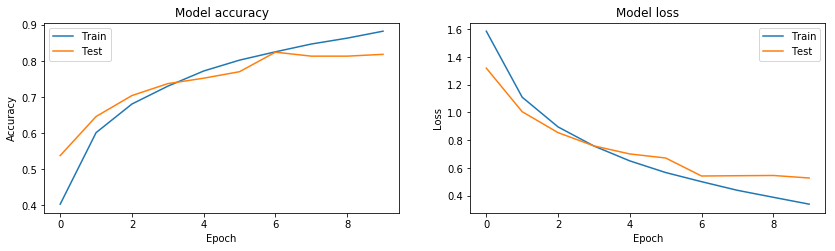

In [70]:
plot_my_history(history_googlenet)

---
## 7 - Evaluate Model
Next, let's evaluate the accuracy of the models that have been trained

we should get accuracy around  <font color='blue'>$80\%$</font>

In [71]:
scores = model_googlenet.evaluate(X_test, y_test_hot, verbose=0)

print("\nModel Accuracy: %.2f%%" % (scores[1]*100))


Model Accuracy: 81.36%


---
---
# [Part 9] Residual Network (2015)

3.6% error rate. That itself should be enough to convince you. 

The [ResNet](https://arxiv.org/abs/1512.03385) model is the best CNN architecture that we currently have and is a great innovation for the idea of residual learning. 

ResNet is a new 152-layer network architecture that Microsoft Research Asia came up with in late 2015, which set new records in classification, detection, and localization through one incredible architecture


<img src='https://adeshpande3.github.io/assets/ResNet.gif' width=300px>

---
## 1 - Inner Layer

Resnet Inner Layers are the convolution layer inside the skip connection.

There are several combinations for the inner layer troughout resnet. 

The combination involves the position of the convolution, presence of activation, and addition of batch norm

---
#### <font color='red'>**EXERCISE:** </font>
<pre>
Implement <b>resnet_layer()</b> function
Use <b>Functional API</b>
    * conv = <b>Conv2D</b> layer with number of filter, kernel size, and stride according to the input arguments, padding=same
    * add conv layer according to the conv_first argument
    * add batchnorm layer according to the batch_normalization argument
    * add activation layer according to the activation argument



In [0]:
def resnet_layer(inputs, 
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    
    # conv layer
    conv = Conv2D(filters=num_filters, 
                  kernel_size=kernel_size,
                  strides=strides, 
                  padding='SAME',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4)
                 )

    # set x as input
    x = inputs
    
    # if conv_first is true, x = conv (x)
    if conv_first:
        x = conv(x)
        
    # if batch_normalization is true, x = BatchNormalization() (x)
    if batch_normalization:
        x = BatchNormalization()(x)
        
    # if activation is not None, x = Activation(activation) (x)
    if activation is not None:
        x = Activation(activation)(x)
    
    # if conv_first is false, x = conv (x)
    if not conv_first:
        x = conv(x)
        
    return x



---
## 2 - Small ResNet Model

---
#### <font color='red'>**EXERCISE:** </font>
<pre>
Implement <b>inception()</b> function


In [0]:
def resnet_small(depth = 20):
  
    input_shape = (32, 32, 3)
    
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    # add Input layer
    inputs = Input(shape=input_shape)
    
    # call resnet_layer funtion with inputs=inputs
    x = resnet_layer(inputs=inputs)
    
    # Instantiate the stack of residual units
    for stack in range(3):
      
        for res_block in range(num_res_blocks):
            
            strides = 1
            
            # check if it is the first layer but not first stack
            if stack > 0 and res_block == 0:
                # downsample for the first layer
                strides = 2
                
            # call resnet_layer function with inputs = x, 
            # num_filters=num_filters, and strides=strides
            y = resnet_layer(inputs=x, num_filters=num_filters, strides=strides)
            
            # call resnet_layer function with inputs = y, 
            # num_filters=num_filters, and activation=None
            y = resnet_layer(inputs=y, num_filters=num_filters, activation=None)
            
            # check if it is the first layer but not first stack
            if stack > 0 and res_block == 0:  
                # linear projection residual shortcut connection to match
                # changed dims
              
                # call resnet_layer function with inputs = x,
                # num_filters=num_filters, kernel_size=1, 
                # strides=strides, activation=None, 
                # and batch_normalization=False
                x = resnet_layer(inputs=x, num_filters=num_filters, kernel_size=1, strides=strides, activation=None, batch_normalization=False)
                
            # add layer output with the skip connection
            x = tf.keras.layers.add([x, y])
        
            # add relu activation
            x = Activation('relu')(x)
            
        # double the number of filter
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU    
    x = AveragePooling2D(pool_size=8)(x)
    
    # flatten the output average
    y = Flatten()(x)
    
    # create output dense of 10 class with softmax activation
    outputs = Dense(10,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs, name='resnet_small')
    return model

---
## 3 - Model Summary
Visualize the model

In [74]:
model_resnet = resnet_small()

model_resnet.summary()

Model: "resnet_small"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_199 (Conv2D)             (None, 32, 32, 16)   448         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 32, 32, 16)   64          conv2d_199[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization_10[0][0]     
_______________________________________________________________________________________

**EXPECTED OUTPUT**:
<pre>
 Total params: 274,442
 Trainable params: 273,066
 Non-trainable params: 1,376

---
## 4 - Plot Model

Save model architecture as an image

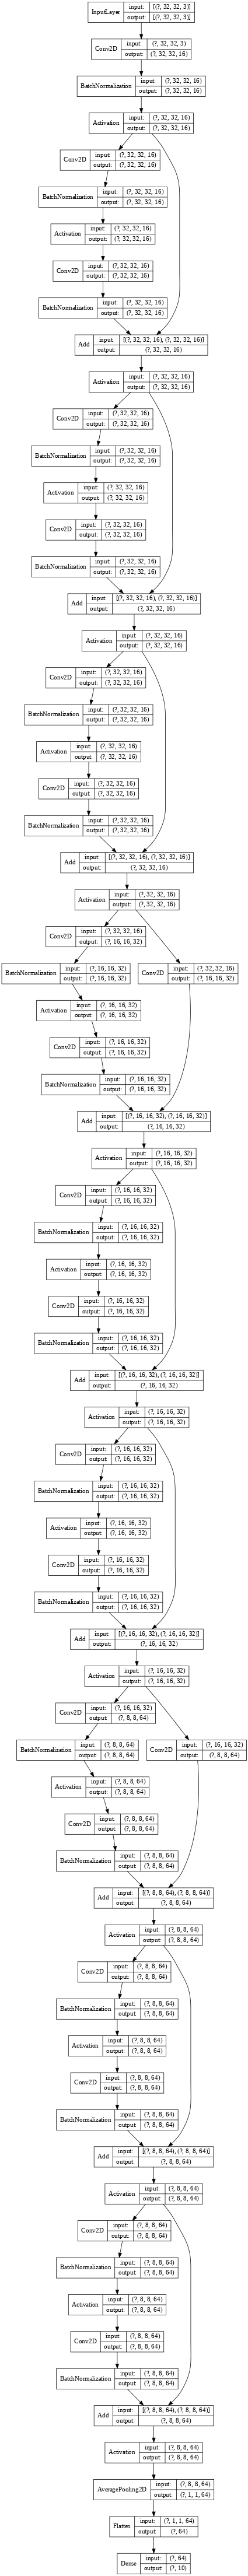

In [75]:
plot_model(model_resnet, 
           to_file=model_resnet.name+'.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB',
           dpi=55
          )

---
## 5 - Learning Rate Schedule

before training this network, let's create a custom Adam Optimizer and learning rate scheduling that will periodically decrease the learning rate to improve the accuracy andavoid overfitting

---
### a. Scheduling Function

---
#### <font color='red'>**EXERCISE:** </font>
<pre>
create a <b>lr_schedule()</b> function that receive input epoch
multiply learning rate with 0.1 if epoch is above 3
multiply learning rate with 0.01 if epoch is above 5
multiply learning rate with 0.001 if epoch is above 7

In [0]:
def lr_schedule(epoch):
  
    # initial learning rate
    lr = 1e-3
    
    # check and reduce the learning rate 
    # according to the epoch
    if epoch > 7:
        lr *= 0.001
    elif epoch > 5:
        lr *= 0.01
    elif epoch > 3:
        lr *= 0.1
        
    print('Learning rate: ', lr)
    
    return lr
  

Check your implementation

In [81]:
lr_schedule(2)
lr_schedule(4)
lr_schedule(6)
lr_schedule(9)

Learning rate:  0.001
Learning rate:  0.0001
Learning rate:  1e-05
Learning rate:  1e-06


1e-06

**EXPECTED OUTPUT**:
<pre>
Learning rate:  0.001
Learning rate:  0.0001
Learning rate:  0.0001
Learning rate:  1e-06
1e-06

---
### b. Scheduling Callback

create a scheduling callback based on the scheduling function

In [0]:
from tensorflow.keras.callbacks import LearningRateScheduler

lr_callback = LearningRateScheduler(lr_schedule)

---
### c. Custom Adam Optimizer

create custom Adam Optimizer with initial leraning rate = 0.001

In [0]:
from tensorflow.keras.optimizers import Adam

myAdam = tf.keras.optimizers.Adam(1e-3)

---
## 6 - Train Model


Run the training process 

---
#### <font color='red'>**EXERCISE:** </font>

    Train the network for 10 epochs
    with batch size = 100
    using your custom Adam Optimizer
    and 'accuracy' as its metric
    also add the lr_callback



In [84]:
num_epochs = 10
batch_size = 100

model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=myAdam, 
    metrics=['accuracy']
)

history_resnet = model_resnet.fit(
    X_train, y_train_hot, 
    validation_data=(X_val, y_val_hot),
    epochs=num_epochs, 
    batch_size=batch_size, 
    callbacks=[lr_callback],
    verbose=2)

Train on 49000 samples, validate on 1000 samples
Learning rate:  0.001
Epoch 1/10
49000/49000 - 35s - loss: 1.5480 - accuracy: 0.4912 - val_loss: 2.0108 - val_accuracy: 0.4240
Learning rate:  0.001
Epoch 2/10
49000/49000 - 30s - loss: 1.1291 - accuracy: 0.6516 - val_loss: 1.5282 - val_accuracy: 0.5100
Learning rate:  0.001
Epoch 3/10
49000/49000 - 30s - loss: 0.9512 - accuracy: 0.7169 - val_loss: 1.1221 - val_accuracy: 0.6700
Learning rate:  0.001
Epoch 4/10
49000/49000 - 30s - loss: 0.8368 - accuracy: 0.7594 - val_loss: 1.1648 - val_accuracy: 0.6470
Learning rate:  0.0001
Epoch 5/10
49000/49000 - 30s - loss: 0.6471 - accuracy: 0.8332 - val_loss: 0.7874 - val_accuracy: 0.7850
Learning rate:  0.0001
Epoch 6/10
49000/49000 - 30s - loss: 0.5931 - accuracy: 0.8510 - val_loss: 0.7892 - val_accuracy: 0.7770
Learning rate:  1e-05
Epoch 7/10
49000/49000 - 30s - loss: 0.5537 - accuracy: 0.8678 - val_loss: 0.7666 - val_accuracy: 0.7830
Learning rate:  1e-05
Epoch 8/10
49000/49000 - 30s - loss: 0

**EXPECTED OUTPUT**:
<pre>
 the loss should start around 1.5 and end around 0.4
 with training accuracy start around 50% and end around 88%

---
## 6 - Visualize Training History

Visualize the train-validation accuracy

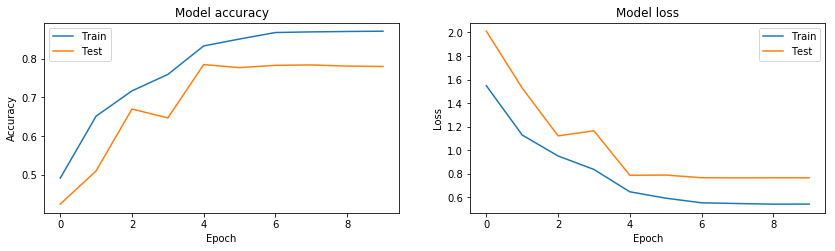

In [85]:
plot_my_history(history_resnet)

---
## 7 - Evaluate Model
Next, let's evaluate the accuracy of the models that have been trained

we should get accuracy around <font color='blue'>$78\%$</font>

In [86]:
scores = model_resnet.evaluate(X_test, y_test_hot, verbose=0)

print("\nModel Accuracy: %.2f%%" % (scores[1]*100))


Model Accuracy: 78.13%



---

# Congratulation, You've Completed Exercise 9

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/andityaarifianto/>2019 - ADF</a> </p>

![footer](https://image.ibb.co/hAHDYK/footer2018.png)